# Analysis: Identified Fraud Accounts

#### Goal:
Define fraud/bad actors in FreshBooks platform.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy import stats
get_ipython().magic(u'config IPCompleter.greedy=True')

sns.set(color_codes=True)

## Fraud Accounts Activities

In [2]:
# Import fraud account life span (days to ban) data
df_fraud_accounts_activity = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data/fraud_accounts_invoices_clients_activity.csv", sep="\t")


# Droping 'NaN' by zero 
df_fraud_accounts_activity_v2 = df_fraud_accounts_activity.fillna(0)

In [148]:
df_fraud_accounts_activity.tail(5)
#df_fraud_accounts_activity_v2.max()

,systemid,client_count,invoice_count,signup_date,last_date,days_to_ban_hammer,client_count_day_7,client_count_day_15,client_count_day_30,client_count_day_45,...,invoice_count_year_1,invoice_count_year_2,invoice_count_year_3,invoice_count_year_4,invoice_count_year_5,invoice_count_year_6,invoice_count_year_7,invoice_count_year_8,invoice_count_year_9,invoice_count_year_10
488,3162278,0,NaN,2018-01-11,2018-01-12,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,3120710,1,NaN,2017-11-29,2017-11-30,1,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490,4164112,2,3.0,2019-03-19,2019-03-20,1,2.0,2.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
491,4319694,1,NaN,2019-05-22,2019-05-23,1,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,4149206,0,NaN,2019-03-13,2019-03-13,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Lifespan distribution of the fraud accounts

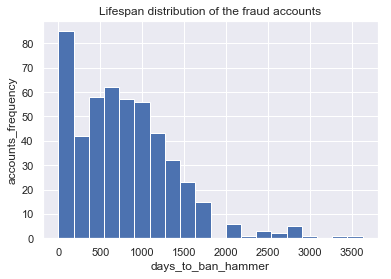

In [130]:
# Histogram to represent the account_frequency vs. days_to_ban_hammer
plt.hist(df_fraud_accounts_activity_v2['days_to_ban_hammer'], bins=20)
plt.xlabel('days_to_ban_hammer')
plt.ylabel('accounts_frequency')
plt.title('Lifespan distribution of the fraud accounts')
plt.show()


Text(0.5,1,'Lifespan distribution of the fraud accounts (greater than 180)')

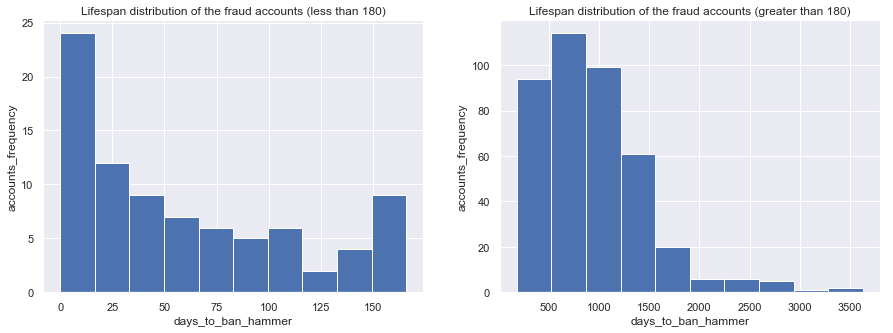

In [131]:
# Histogram to represent the account_frequency vs. days_to_ban_hammer (cutting of outliers)
n_bins = 10
outliers_cutoff = 180

histo_client_fraud_account = sorted(df_fraud_accounts_activity_v2['days_to_ban_hammer'])
histo_client_fraud_account_leOutlier = [i for i in histo_client_fraud_account if i < outliers_cutoff]
histo_client_fraud_account_geOutlier = [i for i in histo_client_fraud_account if i > outliers_cutoff]
histo_client_fraud_account = [histo_client_fraud_account_leOutlier, histo_client_fraud_account_geOutlier ] 

fig, axes = plt.subplots(ncols=2, figsize=(15,5))
ax0, ax1 = axes.flatten()

ax0.hist(histo_client_fraud_account_leOutlier, n_bins, density=False, histtype='bar')
ax0.set_xlabel('days_to_ban_hammer')
ax0.set_ylabel('accounts_frequency')
ax0.set_title('Lifespan distribution of the fraud accounts (less than ' + str(outliers_cutoff) + ')')

ax1.hist(histo_client_fraud_account_geOutlier, n_bins, density=False, histtype='bar')   
ax1.set_xlabel('days_to_ban_hammer')
ax1.set_ylabel('accounts_frequency')
ax1.set_title('Lifespan distribution of the fraud accounts (greater than ' + str(outliers_cutoff) + ')')


### Client distribution of the fraud accounts

Text(0.5,1,'Client distribution of the fraud accounts (greater than 1000)')

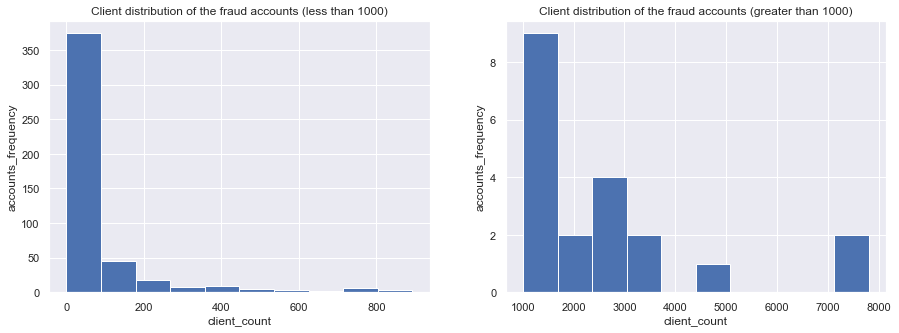

In [132]:
# Histogram for client number distribution with outliers cutoff 
n_bins = 10
outliers_cutoff = 1000

histo_client_fraud_account = sorted(df_fraud_accounts_activity_v2['client_count'])
histo_client_fraud_account_leOutlier = [i for i in histo_client_fraud_account if i < outliers_cutoff]
histo_client_fraud_account_geOutlier = [i for i in histo_client_fraud_account if i > outliers_cutoff]
histo_client_fraud_account = [histo_client_fraud_account_leOutlier, histo_client_fraud_account_geOutlier ] 


fig, axes = plt.subplots(ncols=2, figsize=(15,5))
ax0, ax1 = axes.flatten()

ax0.hist(histo_client_fraud_account_leOutlier, n_bins, density=False, histtype='bar')
ax0.set_xlabel('client_count')
ax0.set_ylabel('accounts_frequency')
ax0.set_title('Client distribution of the fraud accounts (less than ' + str(outliers_cutoff) + ')')

ax1.hist(histo_client_fraud_account_geOutlier, n_bins, density=False, histtype='bar')   
ax1.set_xlabel('client_count')
ax1.set_ylabel('accounts_frequency')
ax1.set_title('Client distribution of the fraud accounts (greater than ' + str(outliers_cutoff) + ')')

### Client count over different time periods

In [133]:
df = df_fraud_accounts_activity_v2[['client_count_day_7',
                                 'client_count_day_15',
                                 'client_count_day_30',
                                 'client_count_day_45',
                                 'client_count_day_60',
                                 'client_count_day_75',
                                 'client_count_day_90',
                                 'client_count_month_6',
                                 'client_count_year_1',
                                 'client_count_year_2',
                                 'client_count_year_3',
                                 'client_count_year_4',
                                 'client_count_year_5',
                                 'client_count_year_6',
                                 'client_count_year_7',
                                 'client_count_year_8',
                                 'client_count_year_9',
                                 'client_count_year_10'
                                ]].dropna().astype(int)

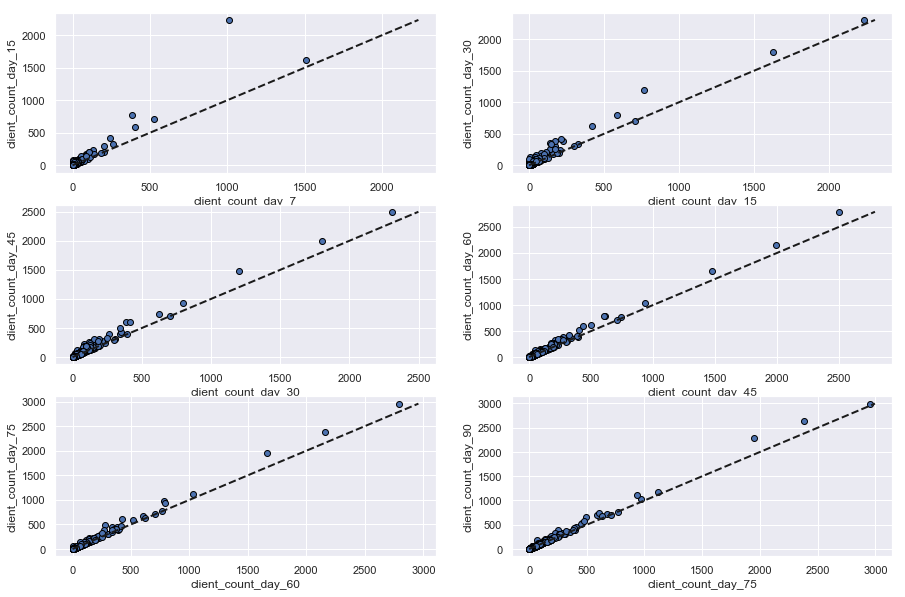

In [134]:
# Pair-to-pair cross-validation plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

#------------------------------------------------------
x0 = df['client_count_day_7']
y0 = df['client_count_day_15']

ax0.scatter(x0, y0, edgecolors=(0, 0, 0))
ax0.plot([y0.min(), y0.max()], [y0.min(), y0.max()], 'k--', lw=2)
ax0.set_xlabel('client_count_day_7')
ax0.set_ylabel('client_count_day_15')

#------------------------------------------------------
x1 = df['client_count_day_15']
y1 = df['client_count_day_30']

ax1.scatter(x1, y1, edgecolors=(0, 0, 0))
ax1.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'k--', lw=2)
ax1.set_xlabel('client_count_day_15')
ax1.set_ylabel('client_count_day_30')

#------------------------------------------------------
x2 = df['client_count_day_30']
y2 = df['client_count_day_45']

ax2.scatter(x2, y2, edgecolors=(0, 0, 0))
ax2.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'k--', lw=2)
ax2.set_xlabel('client_count_day_30')
ax2.set_ylabel('client_count_day_45')


#------------------------------------------------------
x3 = df['client_count_day_45']
y3 = df['client_count_day_60']

ax3.scatter(x3, y3, edgecolors=(0, 0, 0))
ax3.plot([y3.min(), y3.max()], [y3.min(), y3.max()], 'k--', lw=2)
ax3.set_xlabel('client_count_day_45')
ax3.set_ylabel('client_count_day_60')

#------------------------------------------------------
x4 = df['client_count_day_60']
y4 = df['client_count_day_75']

ax4.scatter(x4, y4, edgecolors=(0, 0, 0))
ax4.plot([y4.min(), y4.max()], [y4.min(), y4.max()], 'k--', lw=2)
ax4.set_xlabel('client_count_day_60')
ax4.set_ylabel('client_count_day_75')


#------------------------------------------------------
x5 = df['client_count_day_75']
y5 = df['client_count_day_90']

ax5.scatter(x5, y5, edgecolors=(0, 0, 0))
ax5.plot([y5.min(), y5.max()], [y5.min(), y5.max()], 'k--', lw=2)
ax5.set_xlabel('client_count_day_75')
ax5.set_ylabel('client_count_day_90')

plt.show()

In [135]:
# Aggregrating column values
col_count = {'client_count_day_7':[df['client_count_day_7'].sum()],
             'client_count_day_15':[df['client_count_day_15'].sum()],
             'client_count_day_30':[df['client_count_day_30'].sum()],
             'client_count_day_45':[df['client_count_day_45'].sum()],
             'client_count_day_60':[df['client_count_day_60'].sum()],
             'client_count_day_75':[df['client_count_day_75'].sum()],
             'client_count_day_90':[df['client_count_day_90'].sum()],
             'client_count_month_6':[df['client_count_month_6'].sum()],
             'client_count_year_1':[df['client_count_year_1'].sum()],
             'client_count_year_2':[df['client_count_year_2'].sum()],
             'client_count_year_3':[df['client_count_year_3'].sum()],
             'client_count_year_4':[df['client_count_year_4'].sum()],
             'client_count_year_5':[df['client_count_year_5'].sum()],
             'client_count_year_6':[df['client_count_year_6'].sum()],
             'client_count_year_7':[df['client_count_year_7'].sum()],
             'client_count_year_8':[df['client_count_year_8'].sum()],
             'client_count_year_9':[df['client_count_year_9'].sum()],
             'client_count_year_10':[df['client_count_year_10'].sum()]
            }

df2 = pd.DataFrame(col_count, columns=[ 'client_count_day_7', 'client_count_day_15', 'client_count_day_30',
                                        'client_count_day_45','client_count_day_60', 'client_count_day_75',
                                        'client_count_day_90','client_count_month_6','client_count_year_1',
                                        'client_count_year_2','client_count_year_3', 'client_count_year_4',
                                        'client_count_year_5','client_count_year_6', 'client_count_year_7',
                                        'client_count_year_8','client_count_year_9', 'client_count_year_10'
                                      ])


In [136]:
df2

,client_count_day_7,client_count_day_15,client_count_day_30,client_count_day_45,client_count_day_60,client_count_day_75,client_count_day_90,client_count_month_6,client_count_year_1,client_count_year_2,client_count_year_3,client_count_year_4,client_count_year_5,client_count_year_6,client_count_year_7,client_count_year_8,client_count_year_9,client_count_year_10
0,10473,16808,24865,31068,36064,40556,44526,62225,84201,105868,109745,111486,112152,112520,112866,113054,113172,113192


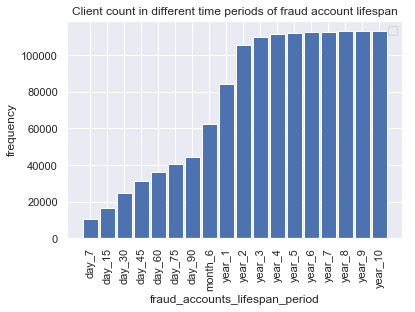

In [137]:
height = [10473, 16808, 24865, 
          31068, 36064, 40556, 
          44526, 62225, 84201,
          105868, 109745, 111486,
          112152, 112520, 112866, 
          113054, 113172, 113192]
bars = ('day_7',  'day_15', 'day_30', 'day_45',  'day_60', 'day_75', 
        'day_90', 'month_6',  'year_1',  'year_2',   'year_3',  'year_4',
        'year_5',  'year_6',  'year_7',   'year_8',   'year_9',  'year_10'
        )
x_pos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19]
y_pos = np.arange(len(bars))

# Create legend
plt.legend()

# Create bars
plt.bar(y_pos, height, width=0.9)


# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=90)
 
# Show graphic
plt.xlabel('fraud_accounts_lifespan_period')
plt.ylabel('frequency')
plt.title('Client count in different time periods of fraud account lifespan')
plt.show() 

#### Client Count of Fraud Accounts: Column Statistics

In [138]:
df_client_count_fraud_account_stat = df.describe()
df_client_count_fraud_account_stat

,client_count_day_7,client_count_day_15,client_count_day_30,client_count_day_45,client_count_day_60,client_count_day_75,client_count_day_90,client_count_month_6,client_count_year_1,client_count_year_2,client_count_year_3,client_count_year_4,client_count_year_5,client_count_year_6,client_count_year_7,client_count_year_8,client_count_year_9,client_count_year_10
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,21.243408,34.093306,50.436105,63.018256,73.152130,82.263692,90.316430,126.217039,170.793103,214.742394,222.606491,226.137931,227.488844,228.235294,228.937120,229.318458,229.557809,229.598377
std,91.714815,139.547961,159.993809,182.538073,205.323637,227.116601,246.786496,336.976995,473.311799,676.834800,696.059331,697.912402,698.413992,698.341966,698.402683,698.479258,698.530795,698.539130
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
50%,5.000000,10.000000,17.000000,20.000000,22.000000,23.000000,23.000000,28.000000,33.000000,37.000000,39.000000,40.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
75%,13.000000,24.000000,43.000000,59.000000,70.000000,75.000000,81.000000,100.000000,113.000000,125.000000,136.000000,137.000000,138.000000,147.000000,147.000000,147.000000,147.000000,147.000000
max,1509.000000,2233.000000,2304.000000,2498.000000,2790.000000,2958.000000,2997.000000,3962.000000,5862.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000


### Invoice Count Activities of Fraud Accounts

Text(0.5,1,'Invoicedistribution of the fraud accounts (less than 1000)')

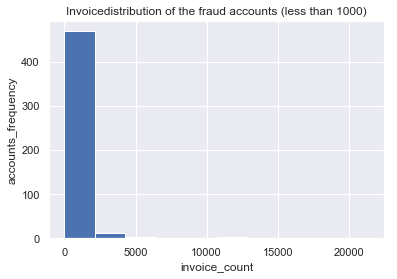

In [139]:
# Histogram for invoice number distribution
n_bins = 10
plt.hist(df_fraud_accounts_activity_v2['invoice_count'], n_bins, density=False, histtype='bar')
plt.xlabel('invoice_count')
plt.ylabel('accounts_frequency')
plt.title('Invoicedistribution of the fraud accounts (less than ' + str(outliers_cutoff) + ')')

Text(0.5,1,'Invoice distribution of the fraud accounts (greater than 500)')

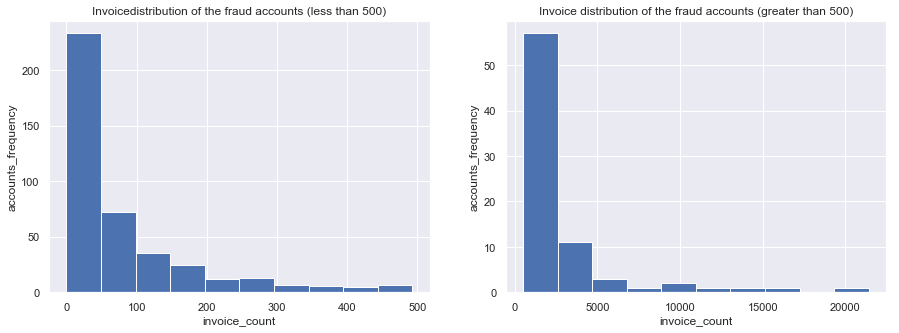

In [140]:
# Histogram for invoice number distribution with outliers cutoff 
n_bins = 10
outliers_cutoff = 500

invoice_count_sorted_fraud_account = sorted(df_fraud_accounts_activity_v2['invoice_count'])
invoice_count_sorted_fraud_account_leOutlier = [i for i in invoice_count_sorted_fraud_account if i < outliers_cutoff]
invoice_count_sorted_fraud_account_geOutlier = [i for i in invoice_count_sorted_fraud_account if i > outliers_cutoff]
#histo_invoice_fraud_account = [histo_invoice_fraud_account_leOutlier, histo_invoice_fraud_account_geOutlier ] 


fig, axes = plt.subplots(ncols=2, figsize=(15,5))
ax0, ax1 = axes.flatten()

ax0.hist(invoice_count_sorted_fraud_account_leOutlier, n_bins, density=False, histtype='bar')
ax0.set_xlabel('invoice_count')
ax0.set_ylabel('accounts_frequency')
ax0.set_title('Invoicedistribution of the fraud accounts (less than ' + str(outliers_cutoff) + ')')

ax1.hist(invoice_count_sorted_fraud_account_geOutlier, n_bins, density=False, histtype='bar')   
ax1.set_xlabel('invoice_count')
ax1.set_ylabel('accounts_frequency')
ax1.set_title('Invoice distribution of the fraud accounts (greater than ' + str(outliers_cutoff) + ')')


### Client count over different time periods

In [141]:
df3 = df_fraud_accounts_activity_v2[['invoice_count_day_7',
                                 'invoice_count_day_15',
                                 'invoice_count_day_30',
                                 'invoice_count_day_45',
                                 'invoice_count_day_60',
                                 'invoice_count_day_75',
                                 'invoice_count_day_90',
                                 'invoice_count_month_6',
                                 'invoice_count_year_1',
                                 'invoice_count_year_2',
                                 'invoice_count_year_3',
                                 'invoice_count_year_4',
                                 'invoice_count_year_5',
                                 'invoice_count_year_6',
                                 'invoice_count_year_7',
                                 'invoice_count_year_8',
                                 'invoice_count_year_9',
                                 'invoice_count_year_10'
                                ]].dropna().astype(int)

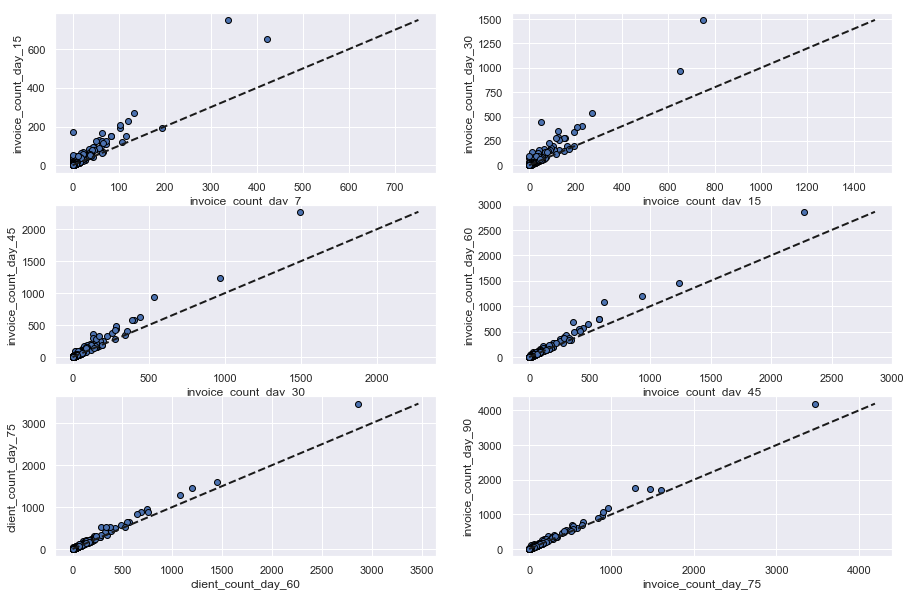

In [142]:
# Pair-to-pair cross-validation plot for invoce count in different time period
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

#------------------------------------------------------
x0 = df3['invoice_count_day_7']
y0 = df3['invoice_count_day_15']

ax0.scatter(x0, y0, edgecolors=(0, 0, 0))
ax0.plot([y0.min(), y0.max()], [y0.min(), y0.max()], 'k--', lw=2)
ax0.set_xlabel('invoice_count_day_7')
ax0.set_ylabel('invoice_count_day_15')

#------------------------------------------------------
x1 = df3['invoice_count_day_15']
y1 = df3['invoice_count_day_30']

ax1.scatter(x1, y1, edgecolors=(0, 0, 0))
ax1.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'k--', lw=2)
ax1.set_xlabel('invoice_count_day_15')
ax1.set_ylabel('invoice_count_day_30')

#------------------------------------------------------
x2 = df3['invoice_count_day_30']
y2 = df3['invoice_count_day_45']

ax2.scatter(x2, y2, edgecolors=(0, 0, 0))
ax2.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'k--', lw=2)
ax2.set_xlabel('invoice_count_day_30')
ax2.set_ylabel('invoice_count_day_45')


#------------------------------------------------------
x3 = df3['invoice_count_day_45']
y3 = df3['invoice_count_day_60']

ax3.scatter(x3, y3, edgecolors=(0, 0, 0))
ax3.plot([y3.min(), y3.max()], [y3.min(), y3.max()], 'k--', lw=2)
ax3.set_xlabel('invoice_count_day_45')
ax3.set_ylabel('invoice_count_day_60')

#------------------------------------------------------
x4 = df3['invoice_count_day_60']
y4 = df3['invoice_count_day_75']

ax4.scatter(x4, y4, edgecolors=(0, 0, 0))
ax4.plot([y4.min(), y4.max()], [y4.min(), y4.max()], 'k--', lw=2)
ax4.set_xlabel('client_count_day_60')
ax4.set_ylabel('client_count_day_75')


#------------------------------------------------------
x5 = df3['invoice_count_day_75']
y5 = df3['invoice_count_day_90']

ax5.scatter(x5, y5, edgecolors=(0, 0, 0))
ax5.plot([y5.min(), y5.max()], [y5.min(), y5.max()], 'k--', lw=2)
ax5.set_xlabel('invoice_count_day_75')
ax5.set_ylabel('invoice_count_day_90')

plt.show()

In [143]:
# Aggregrating column values
invoice_col_count = {'invoice_count_day_7' :[df3['invoice_count_day_7'].sum()],
                     'invoice_count_day_15':[df3['invoice_count_day_15'].sum()],
                     'invoice_count_day_30':[df3['invoice_count_day_30'].sum()],
                     'invoice_count_day_45':[df3['invoice_count_day_45'].sum()],
                     'invoice_count_day_60':[df3['invoice_count_day_60'].sum()],
                     'invoice_count_day_75':[df3['invoice_count_day_75'].sum()],
                     'invoice_count_day_90':[df3['invoice_count_day_90'].sum()],
                     'invoice_count_month_6':[df3['invoice_count_month_6'].sum()],
                     'invoice_count_year_1':[df3['invoice_count_year_1'].sum()],
                     'invoice_count_year_2':[df3['invoice_count_year_2'].sum()],
                     'invoice_count_year_3':[df3['invoice_count_year_3'].sum()],
                     'invoice_count_year_4':[df3['invoice_count_year_4'].sum()],
                     'invoice_count_year_5':[df3['invoice_count_year_5'].sum()],
                     'invoice_count_year_6':[df3['invoice_count_year_6'].sum()],
                     'invoice_count_year_7':[df3['invoice_count_year_7'].sum()],
                     'invoice_count_year_8':[df3['invoice_count_year_8'].sum()],
                     'invoice_count_year_9':[df3['invoice_count_year_9'].sum()],
                     'invoice_count_year_10':[df3['invoice_count_year_10'].sum()]
            }

df4 = pd.DataFrame(invoice_col_count, columns=[ 'invoice_count_day_7', 'invoice_count_day_15', 'invoice_count_day_30',
                                                'invoice_count_day_45','invoice_count_day_60', 'invoice_count_day_75',
                                                'invoice_count_day_90','invoice_count_month_6','invoice_count_year_1',
                                                'invoice_count_year_2','invoice_count_year_3', 'invoice_count_year_4',
                                                'invoice_count_year_5','invoice_count_year_6', 'invoice_count_year_7',
                                                'invoice_count_year_8','invoice_count_year_9', 'invoice_count_year_10'
                                              ])
# Printing histogram bar heitht
height = df4.values.tolist()
height

[[5769,
  10574,
  19640,
  26998,
  33646,
  39673,
  45588,
  73193,
  114960,
  175531,
  204357,
  220022,
  226549,
  231151,
  236013,
  239781,
  240574,
  240804]]

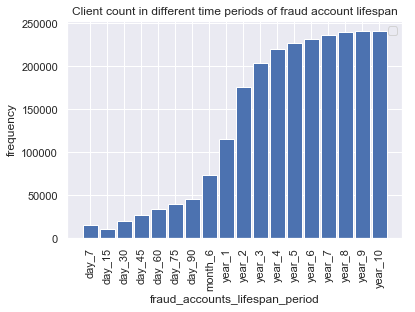

In [145]:
height = [15769, 10574, 19640, 26998, 33646, 39673, 45588, 73193, 
          114960, 175531, 204357, 220022, 226549, 231151, 236013, 
          239781, 240574, 240804]

bars = ('day_7',  'day_15', 'day_30', 'day_45',  'day_60', 'day_75', 
        'day_90', 'month_6',  'year_1',  'year_2',   'year_3',  'year_4',
        'year_5',  'year_6',  'year_7',   'year_8',   'year_9',  'year_10'
        )
x_pos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19]
y_pos = np.arange(len(bars))

# Create legend
plt.legend()

# Create bars
plt.bar(y_pos, height, width=0.9)


# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=90)
 
# Show graphic
plt.xlabel('fraud_accounts_lifespan_period')
plt.ylabel('frequency')
plt.title('Client count in different time periods of fraud account lifespan')
plt.show()

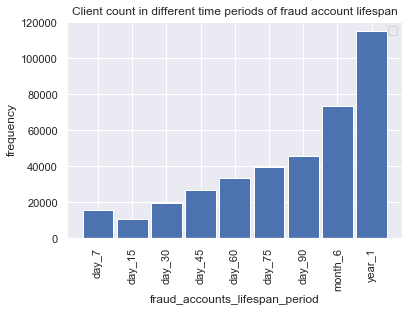

In [146]:
height = [15769, 10574, 19640, 
          26998, 33646, 39673, 
          45588, 73193, 114960]

bars = ('day_7',  'day_15', 'day_30', 
        'day_45',  'day_60', 'day_75', 
        'day_90', 'month_6',  'year_1'
        )
x_pos = [0,1,2,3,4,5,6,7,8]
y_pos = np.arange(len(bars))

# Create legend
plt.legend()

# Create bars
plt.bar(y_pos, height, width=0.9)


# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=90)
 
# Show graphic
plt.xlabel('fraud_accounts_lifespan_period')
plt.ylabel('frequency')
plt.title('Client count in different time periods of fraud account lifespan')
plt.show()

### Word Count per Invoice in Fraud Accounts

#### Invoice description word count

In [123]:
# Import fraud account life span (days to ban) data
df_fraud_accounts_invoices = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data/fraud_accounts_invoices_descriptions.csv", sep="\t")

In [124]:
df_fraud_accounts_invoices.head(5)

,systemid,invoiceid,description,notes,terms,address
0,2202558,641567,DOLLY MADISON CAKES SNO BALLS FAMILY PACK 1x298g,NaN,NaN,NaN
1,2202558,537914,DOLLY MADISON APPLE PIE,NaN,NaN,NaN
2,703630,349260,4 page brochure,NaN,Immediate payment upon receipt of this invoice...,NaN
3,342643,669262,BUSINESS STARTER WEBSITE\r\nwww.vanguard-roofi...,NaN,Payment upon issuing of this invoice is due up...,NaN
4,703630,107994,Professional Profile Creation,NaN,Payment is required upon receipt of your profi...,NaN


In [125]:
import re
def words_count (strg):
    
    #print(strg)
    
    if strg == '' or pd.isnull(strg):
        no_of_words = 0
        #print('NaN')
    else:
        strg_words_list = re.findall(r"[\w']+", strg)
        no_of_words = len(strg_words_list)

        
        #print(strg_words_list)
    
    return no_of_words 
    

In [126]:
# Words count list
words_count_list_description = []  # for invoice description
words_count_list_notes = []        # for invoice notes
words_count_list_terms = []        # for invoice terms
words_count_list_address = []      # for invoice address

# Iterating through the row of the dataframe 
for index, row in df_fraud_accounts_invoices.iterrows():
    #print('\n')
    #print(index)
    
    # itemes string
    description = row['description']
    notes = row['notes']
    terms = row['terms']
    address = row['address']
    
    # word count using 'word_count(string)' function
    wc_description = words_count(description)
    wc_notes = words_count(notes)
    wc_terms = words_count(terms)
    wc_address = words_count(address)
    
    # adding word counts to the list
    words_count_list_description.append(wc_description)
    words_count_list_notes.append(wc_notes)
    words_count_list_terms.append(wc_terms)
    words_count_list_address.append(wc_address)
    
    #print(index, invoice_description, wc)
    #print(index, wc)
    #print('\n')


In [127]:
# Adding words count columns in the dataframe
df_fraud_accounts_invoices['description_words_count'] = words_count_list_description
df_fraud_accounts_invoices['notes_words_count'] = words_count_list_notes
df_fraud_accounts_invoices['terms_words_count'] = words_count_list_terms
df_fraud_accounts_invoices['address_words_count'] = words_count_list_address


In [129]:
df_fraud_accounts_invoices.head()

,systemid,invoiceid,description,notes,terms,address,description_words_count,notes_words_count,terms_words_count,address_words_count
0,2202558,641567,DOLLY MADISON CAKES SNO BALLS FAMILY PACK 1x298g,NaN,NaN,NaN,8,0,0,0
1,2202558,537914,DOLLY MADISON APPLE PIE,NaN,NaN,NaN,4,0,0,0
2,703630,349260,4 page brochure,NaN,Immediate payment upon receipt of this invoice...,NaN,3,0,31,0
3,342643,669262,BUSINESS STARTER WEBSITE\r\nwww.vanguard-roofi...,NaN,Payment upon issuing of this invoice is due up...,NaN,269,0,1300,0
4,703630,107994,Professional Profile Creation,NaN,Payment is required upon receipt of your profi...,NaN,3,0,32,0
